In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/content/drive/My Drive/Position/Position_Salaries_poly.csv'

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/capstone/capstone.csv'
data = pd.read_csv(file_path)

In [ ]:
total_earned_per_trial = data.groupby('Trial')['Earned'].sum().reset_index()


In [ ]:
total_earned_per_trial['Normalized_Total'] = total_earned_per_trial['Earned'] / total_earned_per_trial['Earned'].max()

In [ ]:
# Define features (X) and target variable (y)
X = total_earned_per_trial[['Trial']]
y = total_earned_per_trial['Normalized_Total']


In [ ]:
# Create and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X, y, epochs=1000, verbose=0)


In [ ]:
# Predict the normalized total earned scores
predicted_normalized_total = model.predict(X)

1/1 [==============================] - 0s 306ms/step


In [ ]:
# Denormalize the predicted values
predicted_denormalized_total = predicted_normalized_total * total_earned_per_trial['Earned'].max()

In [ ]:
# Add the predicted values to the DataFrame
total_earned_per_trial['Predicted_Total'] = predicted_denormalized_total

In [ ]:
# Print the DataFrame with Trial, Earned, Normalized_Total, and Predicted_Total columns
print(total_earned_per_trial)

   Trial  Earned  Normalized_Total  Predicted_Total
0      1    71.0          0.835294        69.457481
1      2    73.0          0.858824        71.737427
2      3    69.0          0.811765        74.017372
3      4    73.0          0.858824        76.297340
4      5    83.5          0.982353        78.577286
5      6    82.5          0.970588        80.857216
6      7    85.0          1.000000        83.137146
7      8    82.5          0.970588        85.417107


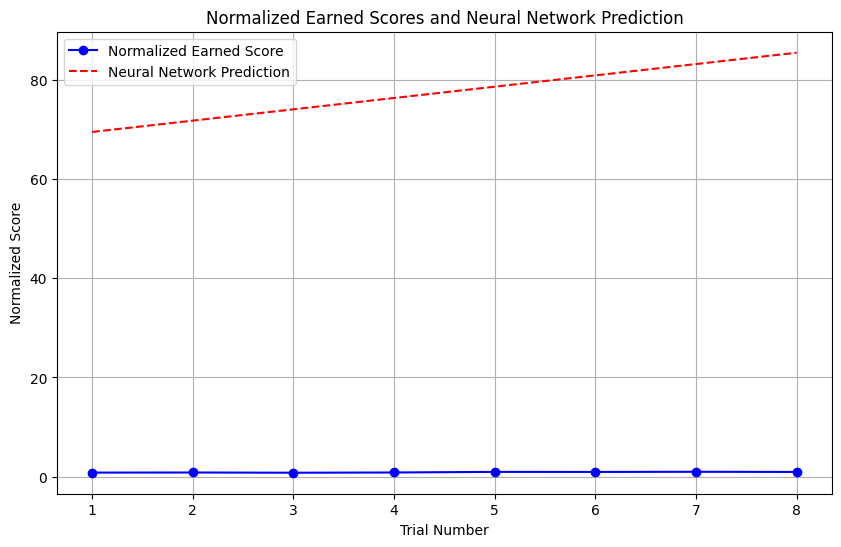

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(total_earned_per_trial['Trial'], total_earned_per_trial['Normalized_Total'], marker='o', linestyle='-', color='b', label='Normalized Earned Score')
plt.plot(total_earned_per_trial['Trial'], total_earned_per_trial['Predicted_Total'], linestyle='--', color='r', label='Neural Network Prediction')
plt.title("Normalized Earned Scores and Neural Network Prediction")
plt.xlabel("Trial Number")
plt.ylabel("Normalized Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X = data[['Trial', 'Question', 'Max']]
y = data['Earned']

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, input_shape=[3], activation='relu'),  # Assuming 3 input features
    tf.keras.layers.Dense(units=1)  # Output layer
])


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X, y, epochs=500, verbose=0)

In [ ]:
data['Predicted Score'] = model.predict(X)

4/4 [==============================] - 0s 8ms/step


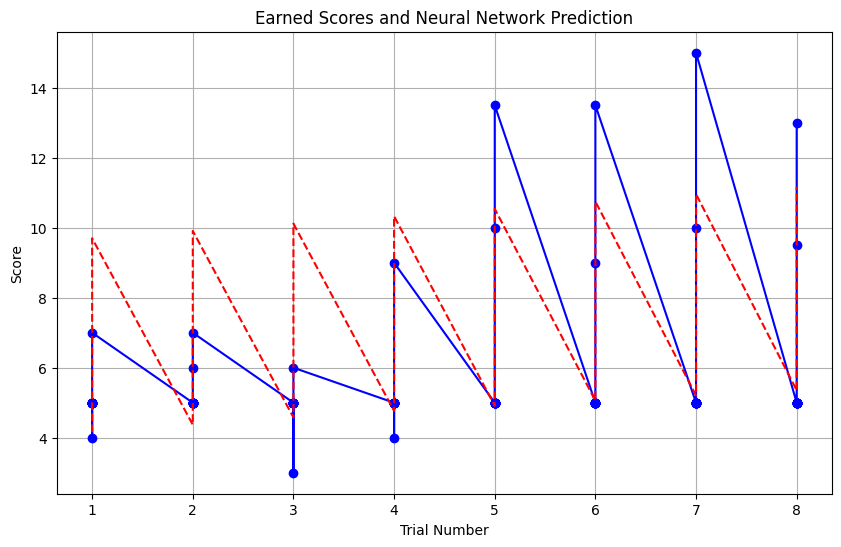

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Trial'], y, marker='o', linestyle='-', color='b', label='Earned Score')
plt.plot(data['Trial'], data['Predicted Score'], linestyle='--', color='r', label='Neural Network Prediction')
plt.title("Earned Scores and Neural Network Prediction")
plt.xlabel("Trial Number")
plt.ylabel("Score")
plt.grid(True)

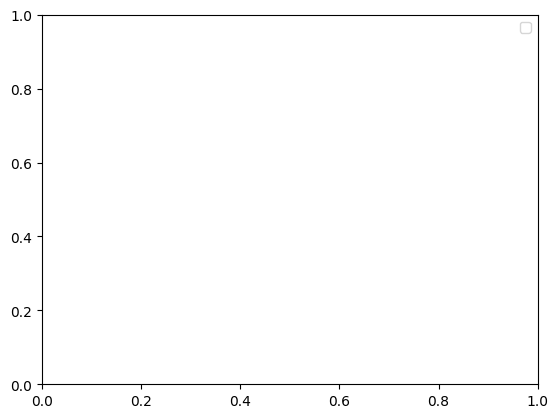

In [ ]:
plt.legend()

In [ ]:
plt.show()

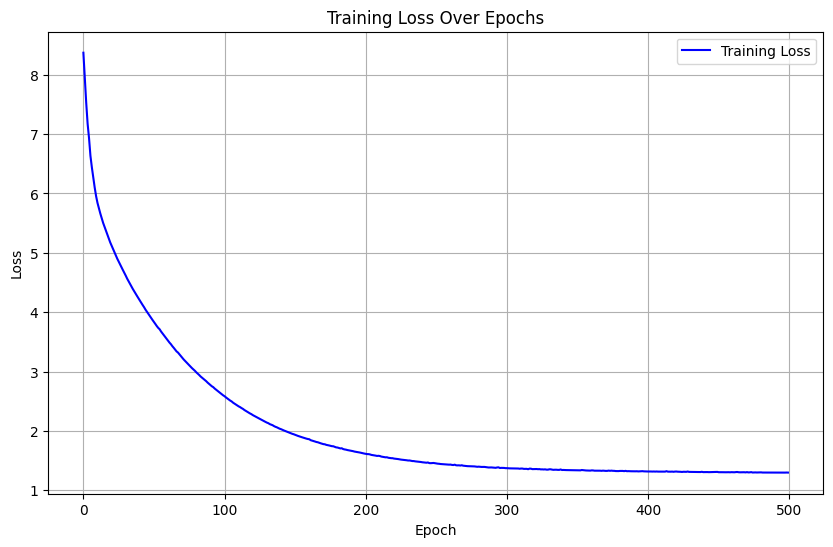

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()